# La Mancha Project: Get to Know Your Region

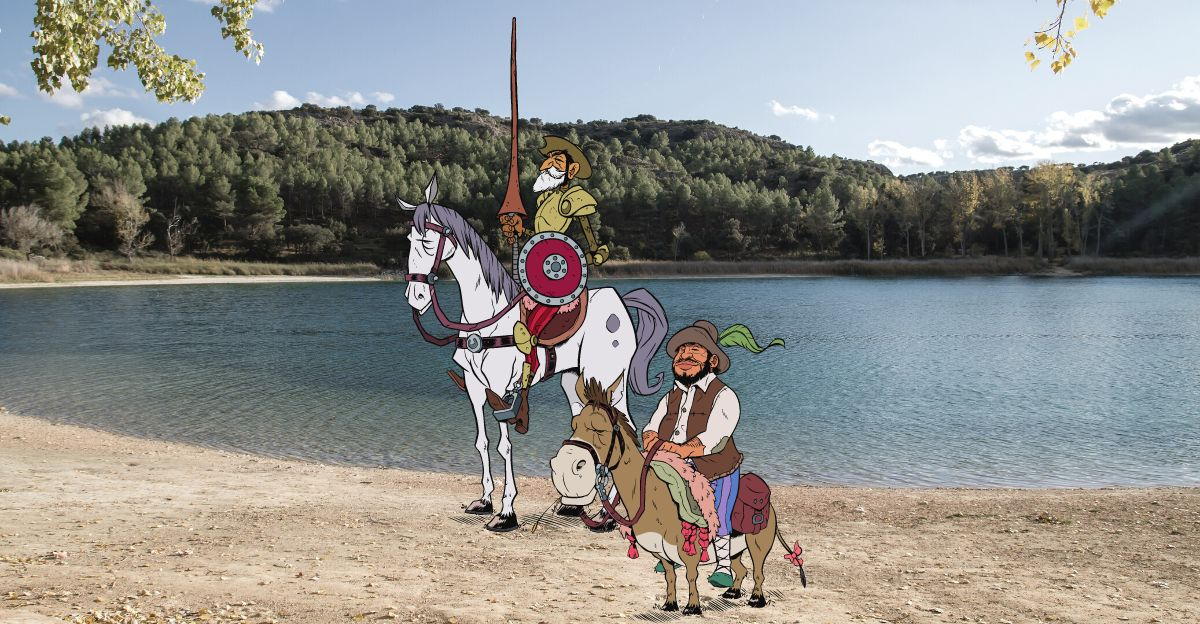

This is the final project of the course "Programming Techniques for NLP". In this notebook we are going to study the data extracted from Wikidata and related to all the personalities born in the province of Ciudad Real (Spain) throughout history. With this information we will then create a quiz.

First of all, we will import all the libraries needed for this project.

In [1]:
import pandas as pd
import csv
from lamancha_utils import get_stats, get_zodiac_sign

C:\Users\usuario\miniconda3\envs\master\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\usuario\miniconda3\envs\master\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\usuario\miniconda3\envs\master\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Set options to display all columns and remove column width limitations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [79]:
df = pd.read_csv("C:\\Users\\usuario\\Desktop\\lamancha-project\\data\\lamancha.csv", doublequote=False)

Let us have a look at the last five entries of our dataset.

In [4]:
df.tail(5)

,person,genderLabel,personLabel,birthDate,placeBirthLabel,description
501,http://www.wikidata.org/entity/Q17413239,masculino,Evaristo Martín Freire,1904-06-29T00:00:00Z,Piedrabuena,farmacéutico español
502,http://www.wikidata.org/entity/Q17631650,masculino,Tomás Aránguez,1942-01-01T00:00:00Z,Brazatortas,empresario español
503,http://www.wikidata.org/entity/Q18812414,masculino,Antonio Manuel Sarmiento García,1979-01-27T00:00:00Z,Villarrubia de los Ojos,futbolista español
504,http://www.wikidata.org/entity/Q18812414,masculino,Antonio Manuel Sarmiento García,1979-07-27T00:00:00Z,Villarrubia de los Ojos,futbolista español
505,http://www.wikidata.org/entity/Q20005385,masculino,Manuel Adriano Arabid Cantos,1908-09-08T00:00:00Z,Herencia,político español


In [5]:
df.shape

(506, 6)

In this first peak we see that we have six columns and 506 rows. It is noticeable that the dataset has duplicates. In these last five entries, it seems that one of the personalities has two different dates of birth associated with it. Let us examine the duplicates in our dataset:

In [80]:
duplicate_names = df[df.duplicated(subset=['personLabel'], keep=False)]
duplicate_names

,person,genderLabel,personLabel,birthDate,placeBirthLabel,description
0,"http://www.wikidata.org/entity/Q32442,masculino,Ángel Ayala,1867-03-01T00:00:00Z,Ciudad Real,""clérigo jesuita","pedagogo y propagandista católico español""""""",NaN,NaN,NaN,NaN
13,"http://www.wikidata.org/entity/Q1690876,masculino,Joaquín Araujo Ruano,1851-01-01T00:00:00Z,Ciudad Real,""pintor","grabador e ilustrador español""""""",NaN,NaN,NaN,NaN
40,"http://www.wikidata.org/entity/Q5495690,masculino,Diego Medrano y Treviño,1784-11-13T00:00:00Z,Ciudad Real,""Militar","político y ensayista español (1784-1853)""""""",NaN,NaN,NaN,NaN
67,http://www.wikidata.org/entity/Q6173045,masculino,Ángel Andrade,1866-03-15T00:00:00Z,Ciudad Real,pintor español
68,http://www.wikidata.org/entity/Q6173045,masculino,Ángel Andrade,1866-05-15T00:00:00Z,Ciudad Real,pintor español
91,"http://www.wikidata.org/entity/Q28124043,masculino,José Núñez de Arenas,1784-07-03T00:00:00Z,Ciudad Real,""político","militar y matemático español""""""",NaN,NaN,NaN,NaN
93,http://www.wikidata.org/entity/Q793631,masculino,Bernardo de Balbuena,1568-01-01T00:00:00Z,Valdepeñas,Poeta y eclesiástico novohispano
94,http://www.wikidata.org/entity/Q793631,masculino,Bernardo de Balbuena,1568-11-30T00:00:00Z,Valdepeñas,Poeta y eclesiástico novohispano
102,http://www.wikidata.org/entity/Q9003232,masculino,Hernán Pérez del Pulgar,1415-01-01T00:00:00Z,Ciudad Real,militar español
103,http://www.wikidata.org/entity/Q9003232,masculino,Hernán Pérez del Pulgar,1451-01-01T00:00:00Z,Ciudad Real,militar español


In [7]:
duplicate_names.shape 

(67, 6)

We got an important insight in our dataset. Now we know we have two different types of duplicates:

* Duplicates due to a different birth dates assigned or an slightly differente description. Because this project has not an investigative scope, we will randombly delete the second duplicate.
* Duplicates due to a bad encoding leading to NaN values. This happens when the entry has a description separated by commas.

Firtly, we have to deal with the NaN values and afterwards we can get rid of the other duplicates. 

The problem with the NaN values is related to the encoding. Our dataset is a csv separated by commas. If other commas are encountered in our dataset, they can be escaped by using doble quotes. However, this seems no to work in 39 cases of our dataset.

In [30]:
nan_values = df.loc[df['person'].str.len() > 48]
print(nan_values.shape)


(39, 6)


In [78]:
nan_values

,person,genderLabel,personLabel,birthDate,placeBirthLabel,description
0,"http://www.wikidata.org/entity/Q32442,masculino,Ángel Ayala,1867-03-01T00:00:00Z,Ciudad Real,""clérigo jesuita","pedagogo y propagandista católico español""""""",NaN,NaN,NaN,NaN
13,"http://www.wikidata.org/entity/Q1690876,masculino,Joaquín Araujo Ruano,1851-01-01T00:00:00Z,Ciudad Real,""pintor","grabador e ilustrador español""""""",NaN,NaN,NaN,NaN
31,"http://www.wikidata.org/entity/Q5864996,masculino,Francisco Aguilera y Egea,1857-03-31T00:00:00Z,Ciudad Real,""Ciudad Real",21.XII.1857 – Madrid,20.V.1931. Capitán general del Ejército,ministro de la Guerra,"senador vitalicio""""""",NaN
40,"http://www.wikidata.org/entity/Q5495690,masculino,Diego Medrano y Treviño,1784-11-13T00:00:00Z,Ciudad Real,""Militar","político y ensayista español (1784-1853)""""""",NaN,NaN,NaN,NaN
91,"http://www.wikidata.org/entity/Q28124043,masculino,José Núñez de Arenas,1784-07-03T00:00:00Z,Ciudad Real,""político","militar y matemático español""""""",NaN,NaN,NaN,NaN
105,"http://www.wikidata.org/entity/Q207668,masculino,Diego de Almagro,1475-01-01T00:00:00Z,Almagro,""conquistador español","adelantado y gobernador de Nueva Toledo""""""",NaN,NaN,NaN,NaN
109,"http://www.wikidata.org/entity/Q55171,masculino,Pedro Almodóvar,1949-09-25T00:00:00Z,Calzada de Calatrava,""director de cine","guionista y productor español""""""",NaN,NaN,NaN,NaN
123,"http://www.wikidata.org/entity/Q6001756,masculino,Juan Manuel Treviño y Aranguren,1879-02-13T00:00:00Z,Ciudad Real,""político español (1879-1936)","marqués de Treviño""""""",NaN,NaN,NaN,NaN
151,"http://www.wikidata.org/entity/Q35831601,masculino,Jordi el Niño Polla,1994-09-11T00:00:00Z,Ciudad Real,""actor pornografico","productor y personalidad de internet español""""""",NaN,NaN,NaN,NaN
155,"http://www.wikidata.org/entity/Q44246351,masculino,Enrique Belda,1969-01-01T00:00:00Z,Ciudad Real,""Jurista y político español (n.1969). Catedrático de Derecho Constitucional","autor de numerosas obras en ese campo e investigador en proyectos competitivos.""""""",NaN,NaN,NaN,NaN


### Drop duplicates (NOT BEFORE NAN VALUES)

In [10]:
df.drop_duplicates(subset=['personLabel'], keep="first", inplace=True)
df.shape

(454, 6)

In [11]:
df.tail(5)

,person,genderLabel,personLabel,birthDate,placeBirthLabel,description
500,http://www.wikidata.org/entity/Q84730296,masculino,Joaquin Campos Pareja,1914-05-07T00:00:00Z,Daimiel,político español
501,http://www.wikidata.org/entity/Q17413239,masculino,Evaristo Martín Freire,1904-06-29T00:00:00Z,Piedrabuena,farmacéutico español
502,http://www.wikidata.org/entity/Q17631650,masculino,Tomás Aránguez,1942-01-01T00:00:00Z,Brazatortas,empresario español
503,http://www.wikidata.org/entity/Q18812414,masculino,Antonio Manuel Sarmiento García,1979-01-27T00:00:00Z,Villarrubia de los Ojos,futbolista español
505,http://www.wikidata.org/entity/Q20005385,masculino,Manuel Adriano Arabid Cantos,1908-09-08T00:00:00Z,Herencia,político español


### Basic information

In [12]:
get_stats(df)

Total rows: 454
Total columns: 6
Name columns: person, genderLabel, personLabel, birthDate, placeBirthLabel, description
Gender:
masculino: 385. femenino: 64. mujer transgénero: 1. 